# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [72]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [73]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval             ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval             
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | jainpur
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | hammerfest
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | balqash
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | ambalavao
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | uturoa
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | warwick
Processing Record 18 of Set 1 | kourou
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | newman
Processing Record 21 of Set 1 | fonadhoo
City not found. Skipping...
Processing Record 22 of

In [74]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [75]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,27.27,84,100,7.93,MU,1707680058
1,blackmans bay,-43.0167,147.3167,14.18,86,100,1.02,AU,1707680093
2,thompson,55.7435,-97.8558,-10.91,85,100,2.06,CA,1707680093
3,jainpur,26.1533,83.3347,12.49,54,0,1.61,IN,1707680094
4,hamilton,39.1834,-84.5333,10.70,63,0,4.02,US,1707680094


In [76]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [77]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,27.27,84,100,7.93,MU,1707680058
1,blackmans bay,-43.0167,147.3167,14.18,86,100,1.02,AU,1707680093
2,thompson,55.7435,-97.8558,-10.91,85,100,2.06,CA,1707680093
3,jainpur,26.1533,83.3347,12.49,54,0,1.61,IN,1707680094
4,hamilton,39.1834,-84.5333,10.70,63,0,4.02,US,1707680094


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

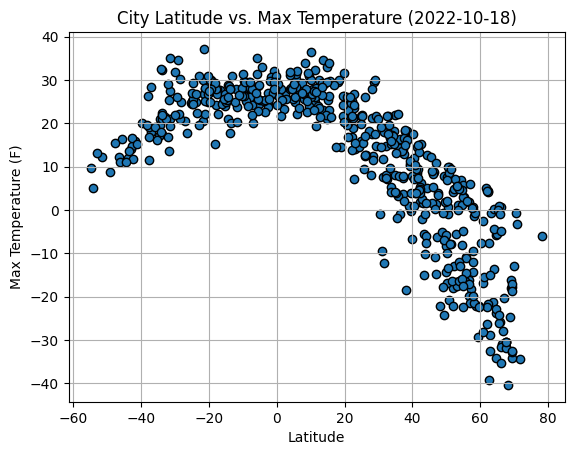

In [78]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

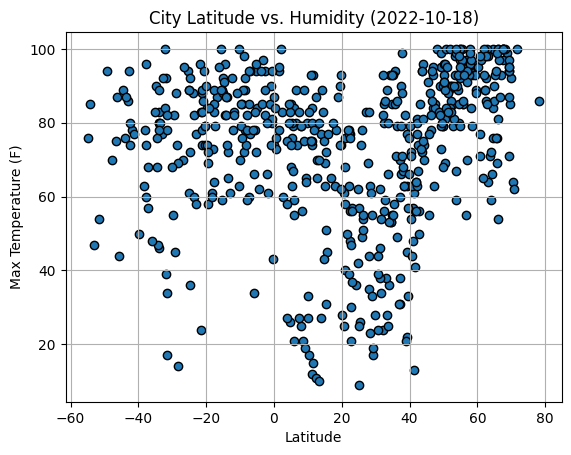

In [94]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

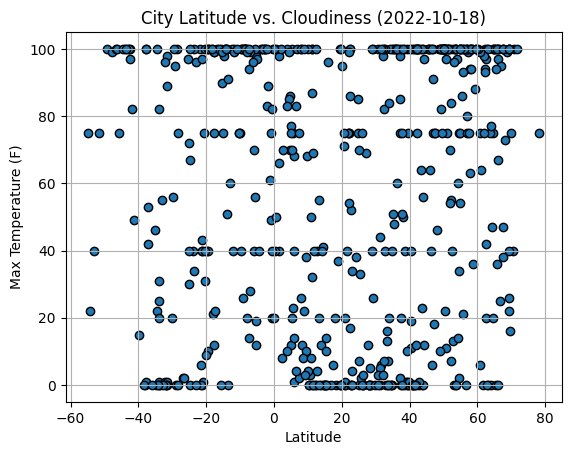

In [95]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

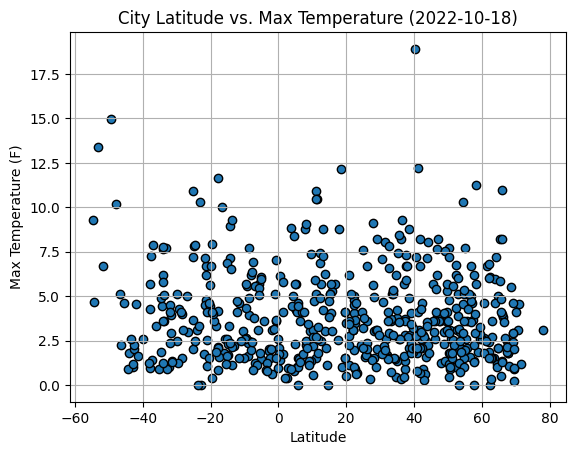

In [81]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression_plot(x, y, xlabel='', ylabel='', title=''):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.text(0.5, 0.9, line_eq, fontsize=12, ha='center', transform=plt.gca().transAxes, color='red')

    regress_values = x * slope + intercept
    
    # Plot scatter plot
    plt.scatter(x, y)

    # Plot regression line
    plt.plot(x, slope*x + intercept, color='red')

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # print the r value
    print(f'The r-value is: {r_value**2}')
    
    # Show plot
    plt.show()
    
  

In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,thompson,55.7435,-97.8558,-10.91,85,100,2.06,CA,1707680093
3,jainpur,26.1533,83.3347,12.49,54,0,1.61,IN,1707680094
4,hamilton,39.1834,-84.5333,10.70,63,0,4.02,US,1707680094
5,hammerfest,70.6634,23.6821,-0.75,64,40,3.09,NO,1707680094
6,aasiaat,68.7098,-52.8699,-24.62,99,99,5.53,GL,1707679977


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,27.27,84,100,7.93,MU,1707680058
1,blackmans bay,-43.0167,147.3167,14.18,86,100,1.02,AU,1707680093
9,edinburgh of the seven seas,-37.0676,-12.3116,18.05,68,42,7.85,SH,1707680078
10,waitangi,-43.9535,-176.5597,12.12,76,100,1.79,NZ,1707680095
11,ambalavao,-21.8333,46.9333,20.61,96,100,1.72,MG,1707680095


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7583037666116293


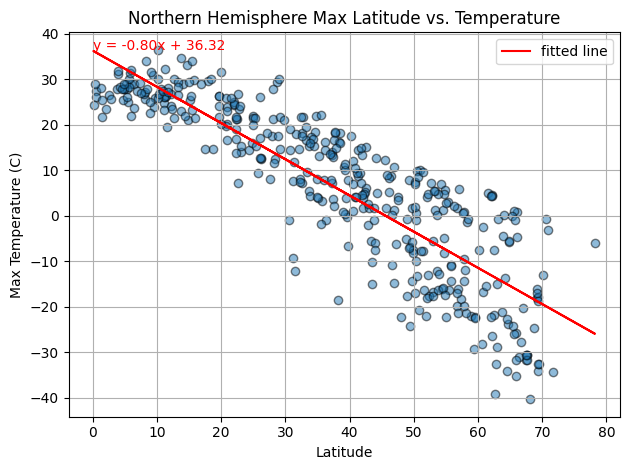

In [85]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
#linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')
# Scatter plot for latitude vs. maximum temperature in the Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], alpha=0.5, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], intercept + slope * northern_hemi_df['Lat'], 'r', label='fitted line')

# Add the equation of the line to the plot
plt.text(0, northern_hemi_df['Max Temp'].max(), f'y = {slope:.2f}x + {intercept:.2f}', color='red')

plt.grid(True)
plt.title("Northern Hemisphere Max Latitude vs. Temperature")
plt.tight_layout()
plt.legend()

# Print the r-value
print(f'The r-value is: {r_value**2}')

# Show plot
plt.show()



The r-value is: 0.44493295972532


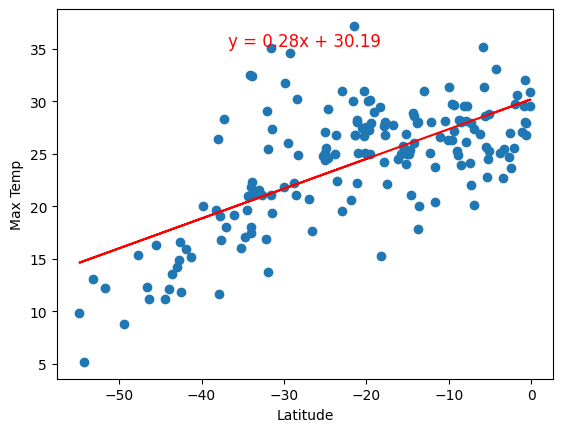

In [86]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19754840651434244


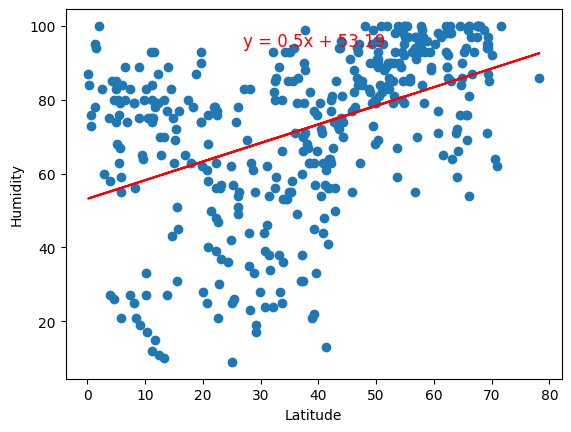

In [87]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 0.033324050865164434


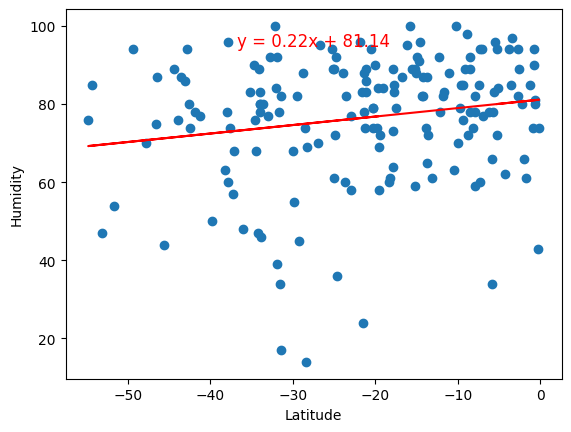

In [88]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08458549188363788


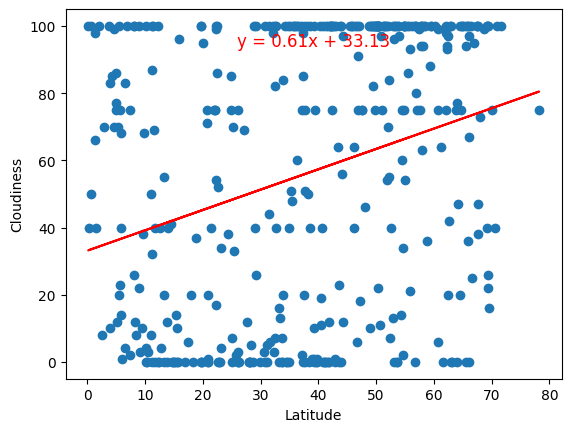

In [89]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.03805272066152283


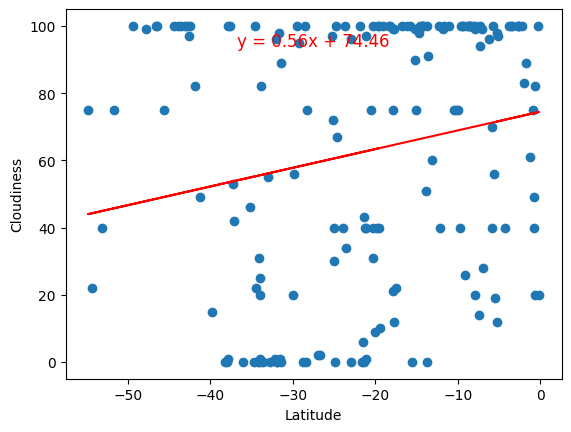

In [90]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0027475760250636944


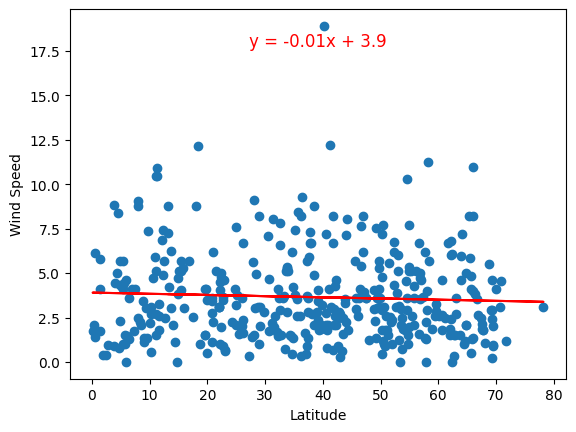

In [92]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: 0.03432599784633969


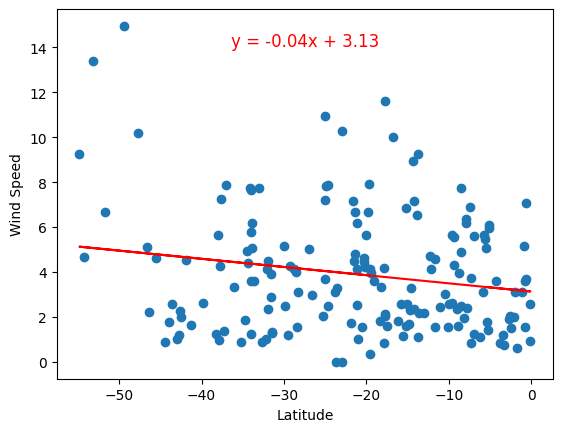

In [93]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE